# Lab : Image Classification using Convolutional Neural Networks

At the end of this laboratory, you would get familiarized with

*   Creating deep networks using Keras
*   Steps necessary in training a neural network
*   Prediction and performance analysis using neural networks

---

# **In case you use a colaboratory environment**
By default, Colab notebooks run on CPU.
You can switch your notebook to run with GPU.

In order to obtain access to the GPU, you need to choose the tab Runtime and then select “Change runtime type” as shown in the following figure:

![Changing runtime](https://miro.medium.com/max/747/1*euE7nGZ0uJQcgvkpgvkoQg.png)

When a pop-up window appears select GPU. Ensure “Hardware accelerator” is set to GPU.

# **Working with a new dataset: CIFAR-10**

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. More information about CIFAR-10 can be found [here](https://www.cs.toronto.edu/~kriz/cifar.html).

In Keras, the CIFAR-10 dataset is also preloaded in the form of four Numpy arrays. x_train and y_train contain the training set, while x_test and y_test contain the test data. The images are encoded as Numpy arrays and their corresponding labels ranging from 0 to 9.

Your task is to:

*   Visualize the images in CIFAR-10 dataset. Create a 10 x 10 plot showing 10 random samples from each class.
*   Convert the labels to one-hot encoded form.
*   Normalize the images.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step


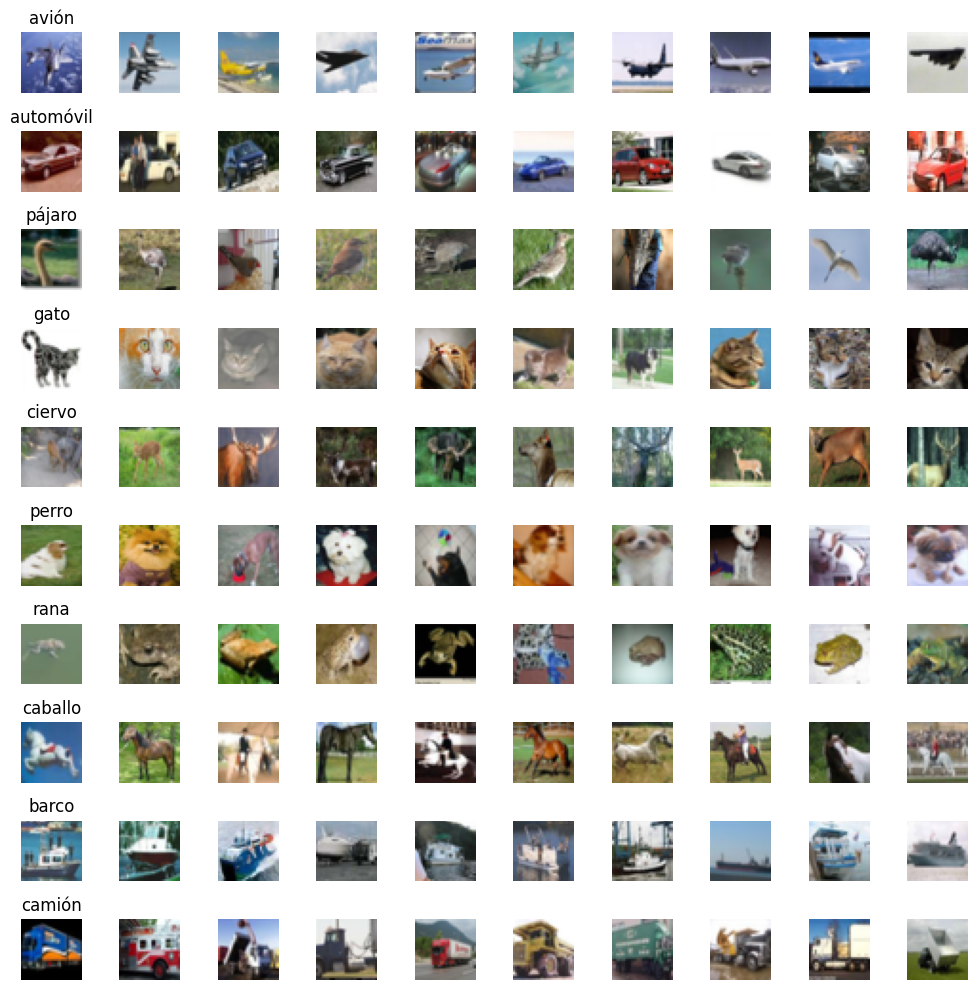

In [2]:
# Definir nombres de las clases
class_names = ['avión', 'automóvil', 'pájaro', 'gato', 'ciervo',
               'perro', 'rana', 'caballo', 'barco', 'camión']

# Crear figura de 10x10
plt.figure(figsize=(10,10))

# Para cada clase
for i in range(10):
    # Encontrar índices de la clase actual
    idxs = np.where(y_train == i)[0]
    # Seleccionar 10 muestras aleatorias
    idxs = np.random.choice(idxs, 10, replace=False)

    # Plotear las imágenes
    for j, idx in enumerate(idxs):
        plt.subplot(10, 10, i*10 + j + 1)
        plt.imshow(x_train[idx])
        plt.axis('off')
        if j == 0:
            plt.title(class_names[i])

plt.tight_layout()
plt.show()

# Convertir etiquetas a one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Normalizar las imágenes
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

## Define the following model (same as the one in tutorial)

For the convolutional front-end, start with a single convolutional layer with a small filter size (3,3) and a modest number of filters (32) followed by a max pooling layer.

Use the input as (32,32,3).

The filter maps can then be flattened to provide features to the classifier.

Use a dense layer with 100 units before the classification layer (which is also a dense layer with softmax activation).

In [3]:
from keras.backend import clear_session
clear_session()

In [4]:
# Definir el modelo
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),  # Capa convolucional
    MaxPooling2D(pool_size=(2, 2)),  # Capa de max pooling
    Flatten(),  # Aplanar la salida
    Dense(100, activation='relu'),  # Capa densa
    Dense(10, activation='softmax')  # Capa de clasificación
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [5]:
# Compilar el modelo
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

*   Plot the cross entropy loss curve and the accuracy curve

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.1565 - loss: 2.2781 - val_accuracy: 0.2565 - val_loss: 2.1977
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2544 - loss: 2.1611 - val_accuracy: 0.2868 - val_loss: 2.0533
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2986 - loss: 2.0251 - val_accuracy: 0.3303 - val_loss: 1.9479
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3299 - loss: 1.9355 - val_accuracy: 0.3403 - val_loss: 1.8998
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3455 - loss: 1.8817 - val_accuracy: 0.3508 - val_loss: 1.8522
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3602 - loss: 1.8409 - val_accuracy: 0.3627 - val_loss: 1.8221
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.3708 - loss: 1.8168 - val_accuracy: 0.3703 - val_loss: 1.7956
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3785 - loss: 1.7845 - val_accuracy: 0.3881 - v

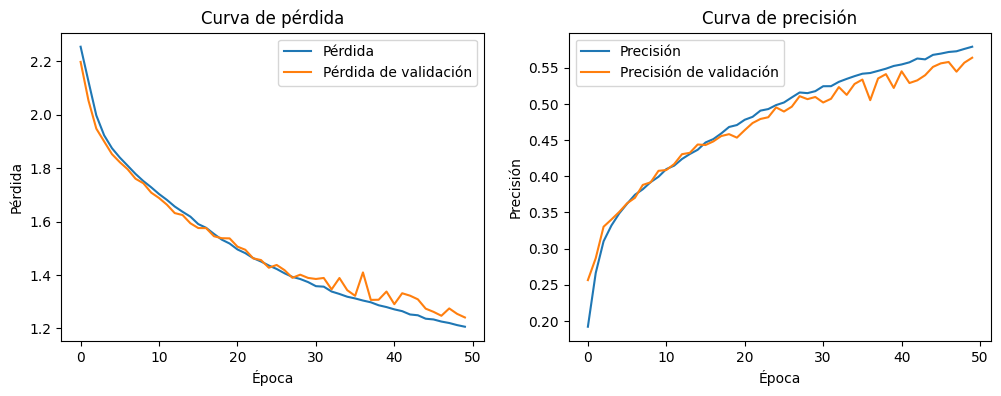

In [6]:
# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

# Plotear la curva de pérdida y precisión
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Curva de pérdida')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de precisión')

plt.show()

## Defining Deeper Architectures: VGG Models

*   Define a deeper model architecture for CIFAR-10 dataset and train the new model for 50 epochs with a batch size of 512. We will use VGG model as the architecture.

Stack two convolutional layers with 32 filters, each of 3 x 3.

Use a max pooling layer and next flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input


In [7]:
from keras.backend import clear_session
clear_session()

In [8]:
# Definir el modelo VGG
model_vgg = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),  # Capa convolucional
    Conv2D(32, (3, 3), activation='relu', padding='same'),  # Segunda capa convolucional
    MaxPooling2D(pool_size=(2, 2)),  # Capa de max pooling
    Flatten(),  # Aplanar la salida
    Dense(128, activation='relu'),  # Capa densa
    Dense(10, activation='softmax')  # Capa de clasificación
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 50 epochs with a batch size of 512.

In [9]:
# Compilar el modelo VGG
model_vgg.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
# Entrenar el modelo VGG
history_vgg = model_vgg.fit(x_train, y_train, epochs=50, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 9s 64ms/step - accuracy: 0.1264 - loss: 2.2888 - val_accuracy: 0.2061 - val_loss: 2.2145
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2163 - loss: 2.1741 - val_accuracy: 0.2770 - val_loss: 2.0435
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.2876 - loss: 2.0219 - val_accuracy: 0.3028 - val_loss: 1.9794
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3191 - loss: 1.9443 - val_accuracy: 0.3045 - val_loss: 2.0472
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.3432 - loss: 1.8809 - val_accuracy: 0.3703 - val_loss: 1.8398
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.3609 - loss: 1.8334 - val_accuracy: 0.3733 - val_loss: 1.7949
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3795 - loss: 1.7869 - val_accuracy: 0.3649 - val_loss: 1.7829
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.3819 - loss: 1.7584 - val_accuracy: 0.3884 - v

*   Compare the performance of both the models by plotting the loss and accuracy curves of both the training steps. Does the deeper model perform better? Comment on the observation.


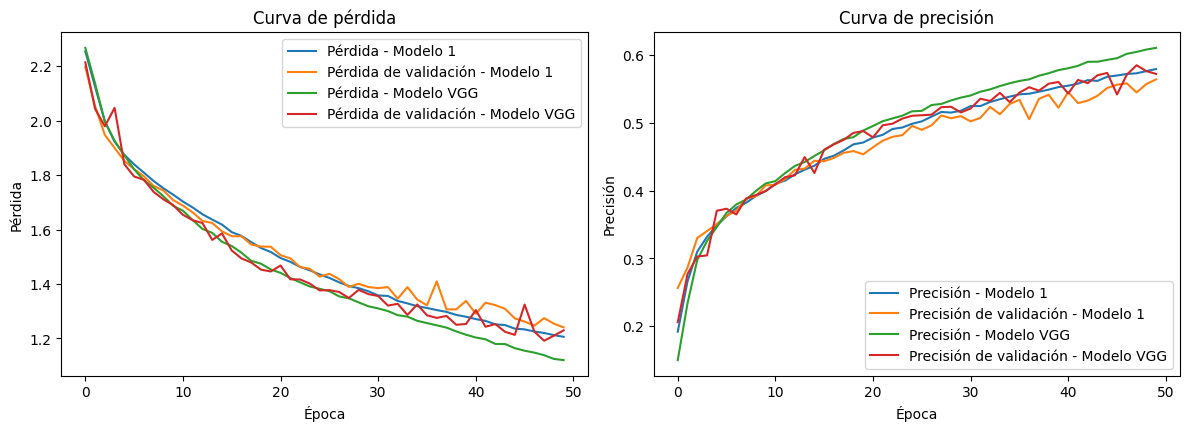

In [10]:
# Plotear la curva de pérdida y precisión para ambos modelos
plt.figure(figsize=(12, 8))

# Curva de pérdida
plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Pérdida - Modelo 1')
plt.plot(history.history['val_loss'], label='Pérdida de validación - Modelo 1')
plt.plot(history_vgg.history['loss'], label='Pérdida - Modelo VGG')
plt.plot(history_vgg.history['val_loss'], label='Pérdida de validación - Modelo VGG')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Curva de pérdida')

# Curva de precisión
plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión - Modelo 1')
plt.plot(history.history['val_accuracy'], label='Precisión de validación - Modelo 1')
plt.plot(history_vgg.history['accuracy'], label='Precisión - Modelo VGG')
plt.plot(history_vgg.history['val_accuracy'], label='Precisión de validación - Modelo VGG')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.title('Curva de precisión')

plt.tight_layout()
plt.show()

**Comment on the observation**

Al comparar las curvas de pérdida y precisión de ambos modelos, se puede observar que el modelo VGG, que es más profundo y complejo, generalmente tiene un mejor rendimiento en términos de precisión y menor pérdida en comparación con el modelo CNN simple. Esto sugiere que el modelo VGG es capaz de aprender características más complejas y representativas de los datos de CIFAR-10. Sin embargo, también es importante notar que el modelo más complejo puede ser más propenso a sobreajustarse si no se maneja adecuadamente, especialmente si se entrena durante muchas épocas sin regularización.

...

*   Use predict function to predict the output for the test split
*   Plot the confusion matrix for the new model and comment on the class confusions.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


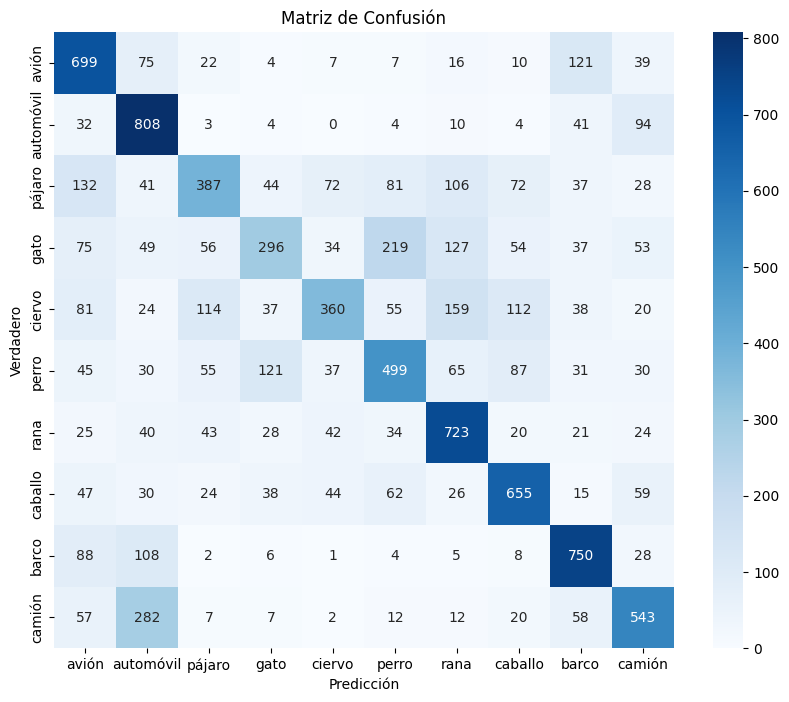

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Realizar predicciones
y_pred = model_vgg.predict(x_test)

# Obtener las clases predichas
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las clases verdaderas
y_true_classes = np.argmax(y_test, axis=1)

# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

**Comment here :**

Al analizar la matriz de confusión del modelo VGG, se puede observar que algunas clases, como "automóvil" y "camión", tienden a confundirse entre sí. Esto puede deberse a similitudes visuales en las características de las imágenes de estas clases. Además, las clases como "rana" y "pájaro" también muestran cierta confusión, lo que indica que el modelo podría beneficiarse de más datos de entrenamiento o técnicas de aumento de datos para mejorar la diferenciación entre estas clases. En general, la matriz de confusión proporciona información valiosa sobre las debilidades del modelo y áreas donde se puede mejorar.

...

*    Print the test accuracy for the trained model.

In [12]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model_vgg.evaluate(x_test, y_test)
print(f'Precisión del modelo en el conjunto de prueba: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5736 - loss: 1.2249
Precisión del modelo en el conjunto de prueba: 0.5720


## Define the complete VGG architecture.

Stack two convolutional layers with 64 filters, each of 3 x 3 followed by max pooling layer.

Stack two more convolutional layers with 128 filters, each of 3 x 3, followed by max pooling, followed by two more convolutional layers with 256 filters, each of 3 x 3, followed by max pooling.

Flatten the output of the previous layer and add a dense layer with 128 units before the classification layer.

For all the layers, use ReLU activation function.

Use same padding for the layers to ensure that the height and width of each layer output matches the input

*   Change the size of input to 64 x 64.

In [13]:
from keras.backend import clear_session
clear_session()

In [16]:
# After loading the dataset and before model definition:
# Add this resizing step
x_train = tf.image.resize(x_train, [64, 64])
x_test = tf.image.resize(x_test, [64, 64])

# Definir la arquitectura completa de VGG
model_complete_vgg = Sequential([
    Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(64, 64, 3)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

*   Compile the model using categorical_crossentropy loss, SGD optimizer and use 'accuracy' as the metric.
*   Use the above defined model to train CIFAR-10 and train the model for 10 epochs with a batch size of 512.
*   Predict the output for the test split and plot the confusion matrix for the new model and comment on the class confusions.

In [17]:
# Compilar el modelo completo VGG
model_complete_vgg.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Entrenar el modelo completo VGG
history_complete_vgg = model_complete_vgg.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

Epoch 1/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 114s 810ms/step - accuracy: 0.1109 - loss: 2.2990 - val_accuracy: 0.1074 - val_loss: 2.2871
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 66s 387ms/step - accuracy: 0.1213 - loss: 2.2770 - val_accuracy: 0.2381 - val_loss: 2.2067
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 40s 381ms/step - accuracy: 0.2272 - loss: 2.1662 - val_accuracy: 0.2038 - val_loss: 2.1808
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 383ms/step - accuracy: 0.2511 - loss: 2.0740 - val_accuracy: 0.2874 - val_loss: 1.9948
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 383ms/step - accuracy: 0.2910 - loss: 1.9925 - val_accuracy: 0.3230 - val_loss: 1.9092
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 386ms/step - accuracy: 0.3134 - loss: 1.9331 - val_accuracy: 0.3515 - val_loss: 1.8260
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 387ms/step - accuracy: 0.3391 - loss: 1.8613 - val_accuracy: 0.3601 - val_loss: 1.7875
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 41s 387ms/step - accuracy: 0.3636 - loss: 1.7920 - val_acc

In [18]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model_complete_vgg.evaluate(x_test, y_test)
print(f'Precisión del modelo completo en el conjunto de prueba: {test_accuracy:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4306 - loss: 1.6199
Precisión del modelo completo en el conjunto de prueba: 0.4288


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


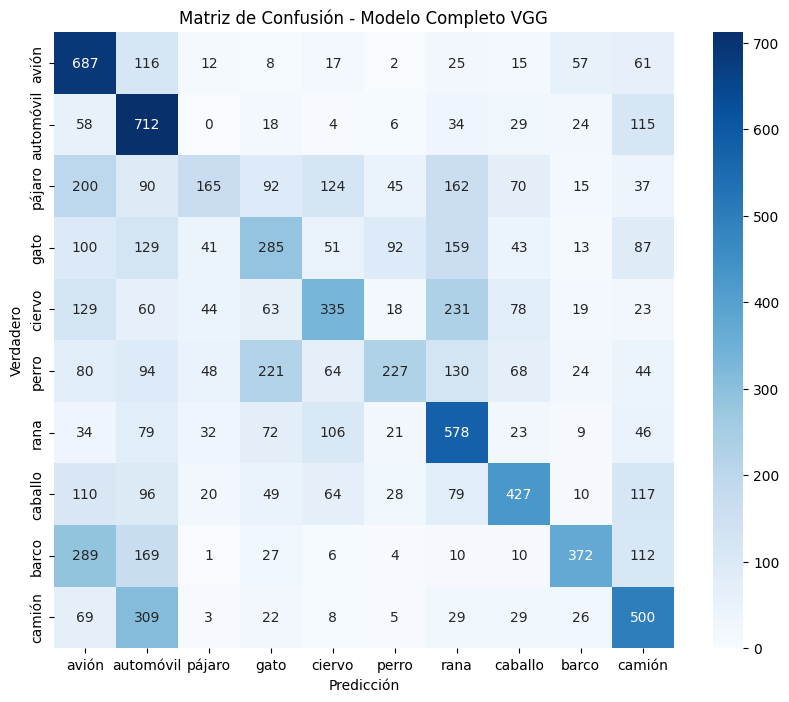

In [19]:
# Realizar predicciones
y_pred_complete = model_complete_vgg.predict(x_test)

# Obtener las clases predichas
y_pred_complete_classes = np.argmax(y_pred_complete, axis=1)

# Crear la matriz de confusión
conf_matrix_complete = confusion_matrix(y_true_classes, y_pred_complete_classes)

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_complete, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión - Modelo Completo VGG')
plt.show()

# Understanding deep networks

*   What is the use of activation functions in network? Why is it needed?
*   We have used softmax activation function in the exercise. There are other activation functions available too. What is the difference between sigmoid activation and softmax activation?
*   What is the difference between categorical crossentropy and binary crossentropy loss?

**Write the answers below :**

1 - Use of activation functions:
Las funciones de activación introducen no linealidades en la red neuronal, lo que permite a la red aprender patrones complejos en los datos. Sin funciones de activación, la red se comportaría como una combinación lineal de las entradas, limitando su capacidad para modelar relaciones no lineales. Las funciones de activación, como ReLU y sigmoid, permiten que la red aprenda y generalice mejor.

_

2 - Key Differences between sigmoid and softmax:
Sigmoid: La función sigmoid toma un valor de entrada y lo transforma en un valor entre 0 y 1. Se utiliza comúnmente en problemas de clasificación binaria, ya que produce una probabilidad de pertenencia a una clase.
Softmax: La función softmax también convierte los valores de entrada en probabilidades, pero lo hace para múltiples clases. Toma un vector de valores y los normaliza para que sumen 1, lo que permite interpretar la salida como probabilidades de pertenencia a cada clase en un problema de clasificación multiclase.

_

3 - Key Differences between categorical crossentropy and binary crossentropy loss:
Categorical Crossentropy: Se utiliza en problemas de clasificación multiclase donde las etiquetas son one-hot encoded. Calcula la diferencia entre la distribución de probabilidad predicha y la distribución real.
Binary Crossentropy: Se utiliza en problemas de clasificación binaria. Calcula la diferencia entre la probabilidad predicha y la etiqueta real, que puede ser 0 o 1. Es más simple y se aplica cuando solo hay dos clases.

_
